# Exam Practical Solution

## Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have made some changes to the dataset after validation:
- recipe: Numeric value without missing data, same as the description. No cleaning is needed
- calories: Numeric value with missing data, same as the description. No cleaning is needed with missing data dropped
- carbohydrate: Numeric value with missing data, same as the description. No cleaning is needed with missing data dropped
- sugar: Numeric value with missing data, same as the description. No cleaning is needed with missing data dropped
- protein: Numeric value with missing data, same as the description. No cleaning is needed with missing data dropped
- category: 10 categories without missing value. Cleaning needing to assign inconsistent categories
- servings: Numeric value without missing data, same as the description. No cleaning is needed
- high_traffic: Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('ggplot') 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
sns.set_palette('PuOr', 11)

In [93]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [94]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [95]:
df['recipe'].nunique()

947

In [96]:
df['category'].nunique()

11

In [97]:
category = ['Lunch/Snacks','Beverages','Potato','Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']
not_listed = list(set(df['category'].unique())-set(category))
print(f'Number of unlisted category {len(not_listed)}')

Number of unlisted category 1


In [98]:
df.loc[(df['category'] == not_listed[0], 'category')] = 'Chicken'
not_listed = list(set(df['category'].unique())-set(category))
print(f'Number of unlisted category {len(not_listed)}')
df['category'].unique()

Number of unlisted category 0


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [99]:
df['servings'].dtype

dtype('O')

In [100]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [101]:
df['servings'] = df['servings'].apply(lambda a: int(a[0]))

In [102]:
df['servings'].dtype

dtype('int64')

In [103]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [104]:
df['high_traffic'].value_counts(dropna=False)

High    574
NaN     373
Name: high_traffic, dtype: int64

In [105]:
#Dealing with Missing Data
print('Ratio of Missing Data in each Columns\n')
print(df.isna().sum()/len(df))
df.dropna(subset=['calories', 'protein', 'sugar', 'carbohydrate'],inplace=True) #The missing data is dropped due to how small a portion the data it was

Ratio of Missing Data in each Columns

recipe          0.000000
calories        0.054910
carbohydrate    0.054910
sugar           0.054910
protein         0.054910
category        0.000000
servings        0.000000
high_traffic    0.393875
dtype: float64


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.9+ KB


In [107]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


## Exploratory Analysis
I have investigated the target variable and features of the recipe, and the relationship between target variable and features. After the analysis,I decided to apply the following changes to enable modeling and visualization:
- high_traffic: Converted the missing value to "Low"

### Target Variable - High Traffic
Since we need to predict the site traffic, the high_traffic variable would be our target variable. From the Countplot on the left below, we can see there is only one option in the plot. Therefore, the missing value of the price variable was converted to low to enable the accurate display of the count of the recipes that result in high or low traffic as visible from the Countplot on the right below

[Text(0.5, 1.0, 'The Distribution of Target Variable - High Traffic')]

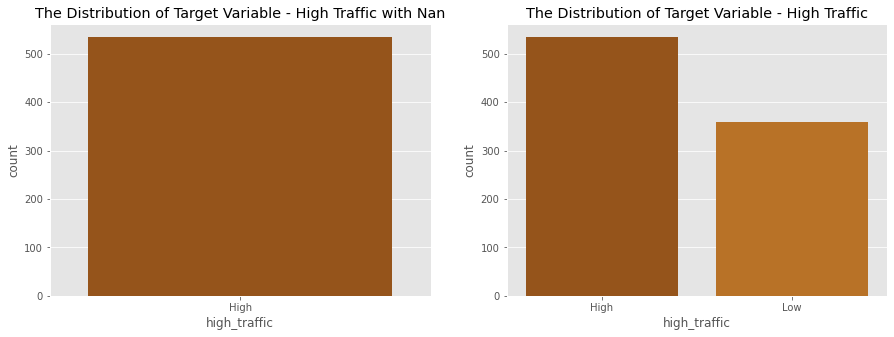

In [108]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='high_traffic',  ax=axes[0]).set(title='The Distribution of Target Variable - High Traffic with Nan')
df['high_traffic'].fillna('Low', inplace=True)
sns.countplot(data=df, x='high_traffic',  ax=axes[1]).set(title='The Distribution of Target Variable - High Traffic')

### Numeric Variables - Calories, Carbohydrate, Sugar, Protein

From the heatmap below, we can conclude that there is no linearity between the feature variables present in the data set.
The distributions of these variables were visualized to show that the numerical variables have similar distributions this eliminates the need to scale the data in considering the models to be applied

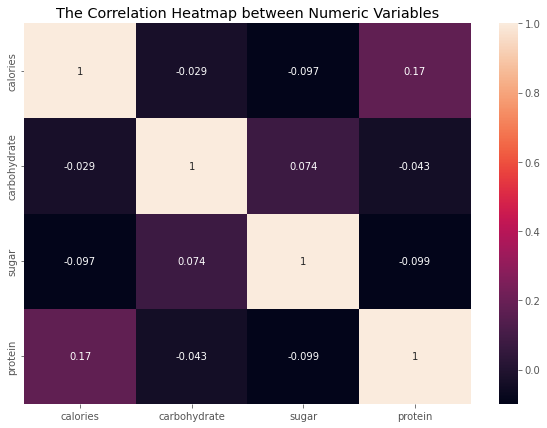

In [109]:
fig, axes = plt.subplots(figsize=(10,7))
numeric = df[['calories', 'carbohydrate', 'sugar', 'protein']]
sns.heatmap(numeric.corr(),annot=True, ax=axes).set(title='The Correlation Heatmap between Numeric Variables');

In [110]:
# fig, axes = plt.subplots(2,3,figsize=(15,12))


# sns.histplot(data=df, x='calories', ax=axes[0][0]).set(title='The Distribution of Feature Variable - Calories')
# sns.histplot(data=df, x='carbohydrate', ax=axes[0][1]).set(title='The Distribution of Feature Variable - Carbohydrate')
# sns.histplot(data=df, x='sugar', ax=axes[0][2]).set(title='The Distribution of Feature Variable - Sugar')
# sns.histplot(data=df, x='protein', ax=axes[1][0]).set(title='The Distribution of Feature Variable - Protein')
# sns.histplot(data=df, x='servings', ax=axes[1][1]).set(title='The Distribution of Feature Variable - Servings')
# plt.tight_layout()
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])

[Text(0.5, 1.0, 'The Distribution of Feature Variable - Sugar')]

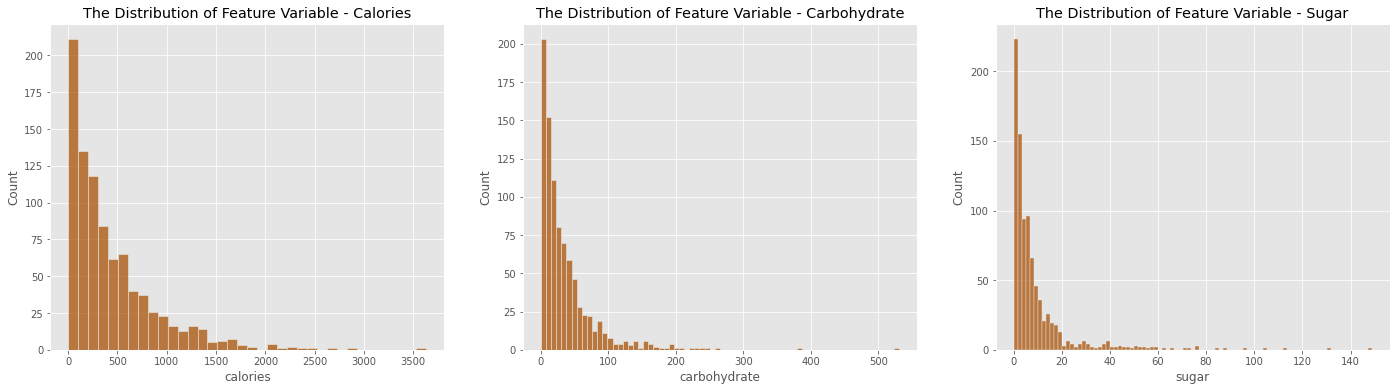

In [111]:
fig, axes = plt.subplots(1,3,figsize=(24,6))

sns.histplot(data=df, x='calories', ax=axes[0]).set(title='The Distribution of Feature Variable - Calories')
sns.histplot(data=df, x='carbohydrate', ax=axes[1]).set(title='The Distribution of Feature Variable - Carbohydrate')
sns.histplot(data=df, x='sugar', ax=axes[2]).set(title='The Distribution of Feature Variable - Sugar')

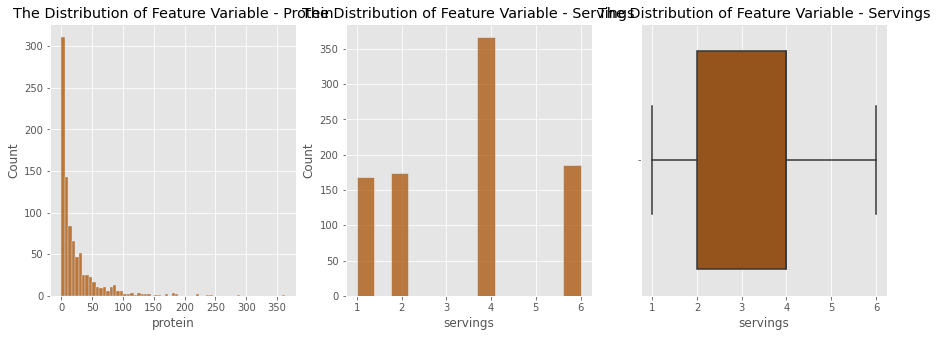

In [112]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data=df, x='protein', ax=axes[0]).set(title='The Distribution of Feature Variable - Protein')
sns.histplot(data=df, x='servings', ax=axes[1]).set(title='The Distribution of Feature Variable - Servings')
sns.boxplot(data=df, x='servings', ax=axes[2]).set(title='The Distribution of Feature Variable - Servings')
plt.show()

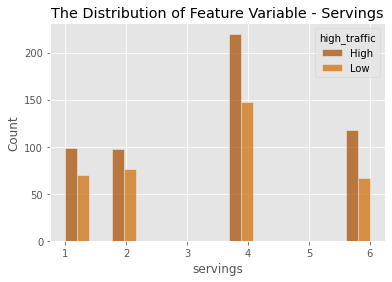

In [113]:
sns.histplot(data=df, x='servings',hue='high_traffic',multiple='dodge').set(title='The Distribution of Feature Variable - Servings')
plt.show()

#### Relationship between calories, carbohydrate, sugar, protein and high_traffic
Barplots and Boxplot are selected in order determine the relationship between the numerical variable and the target variable. 
- The result from the barplot shows the relationship of the average percentage of recipe that contribute toward high and low traffic. The plot shows on average recipes that are more caloric dense result in high traffic, sugary result in low traffic, high protein content result in high traffic and lastly those that have more carbohydrate result in high traffic.
- The high standard deviation of the plots prompted futher investigation into the distribution of the variables relating to the traffic. This necesitated the use of boxplot to get a better understanding of the distribution of the numeric variable and high_traffic

[Text(0.5, 1.0, 'Distribution of High Traffic vs Calories')]

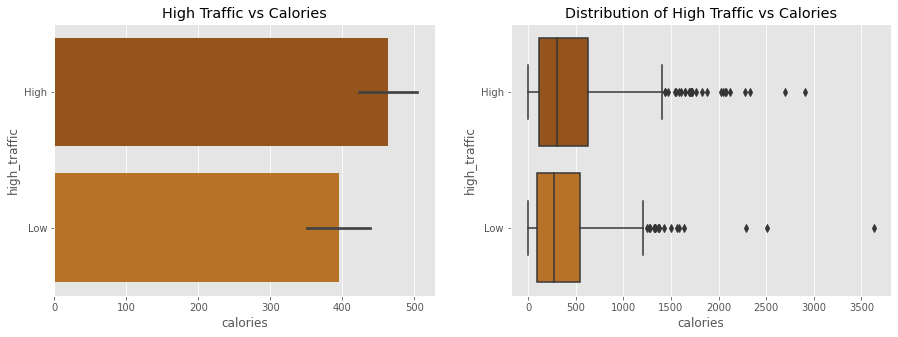

In [114]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=df, x='calories', y='high_traffic', ax=axes[0]).set(title='High Traffic vs Calories')
sns.boxplot(data=df, x='calories', y='high_traffic', ax=axes[1]).set(title='Distribution of High Traffic vs Calories')

[Text(0.5, 1.0, 'Distribution of High Traffic vs Carbohydrate')]

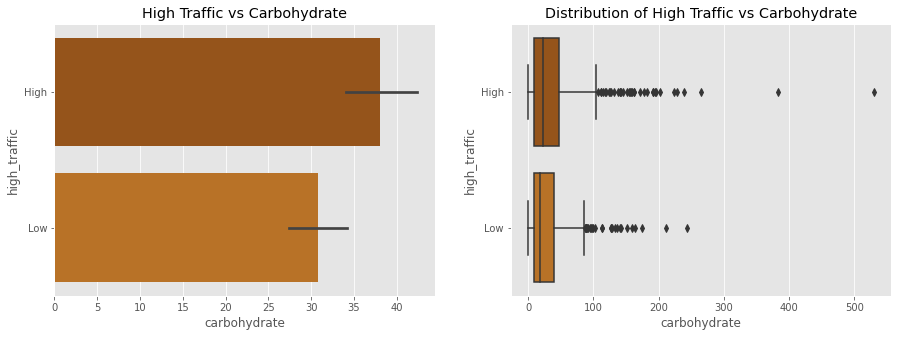

In [115]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=df, x='carbohydrate', y='high_traffic', ax=axes[0]).set(title='High Traffic vs Carbohydrate')
sns.boxplot(data=df, x='carbohydrate', y='high_traffic', ax=axes[1]).set(title='Distribution of High Traffic vs Carbohydrate')

[Text(0.5, 1.0, 'Distribution of High Traffic vs sugar')]

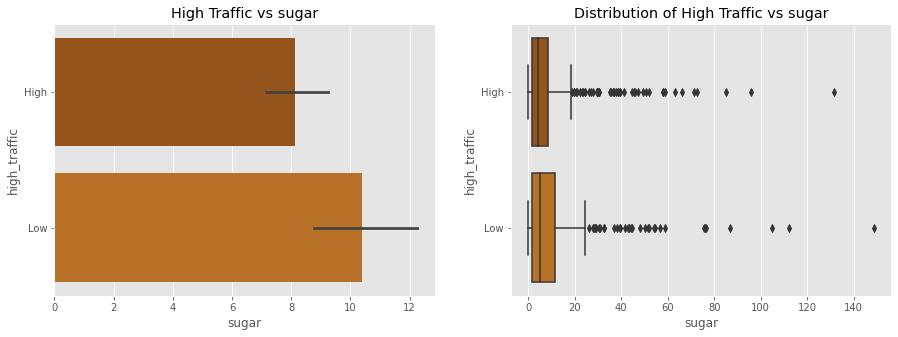

In [116]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=df, x='sugar', y='high_traffic', ax=axes[0]).set(title='High Traffic vs sugar')
sns.boxplot(data=df, x='sugar', y='high_traffic', ax=axes[1]).set(title='Distribution of High Traffic vs sugar')

[Text(0.5, 1.0, 'Distribution of High Traffic vs protein')]

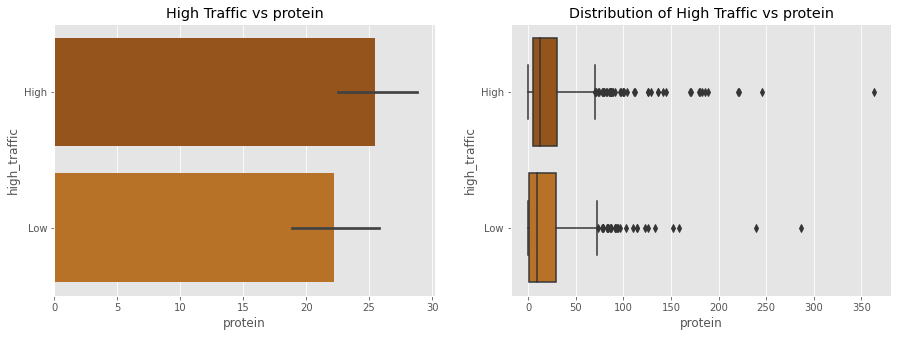

In [117]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=df, x='protein', y='high_traffic', ax=axes[0]).set(title='High Traffic vs protein')
sns.boxplot(data=df, x='protein', y='high_traffic', ax=axes[1]).set(title='Distribution of High Traffic vs protein')

[Text(0.5, 1.0, 'Distribution of High Traffic vs servings')]

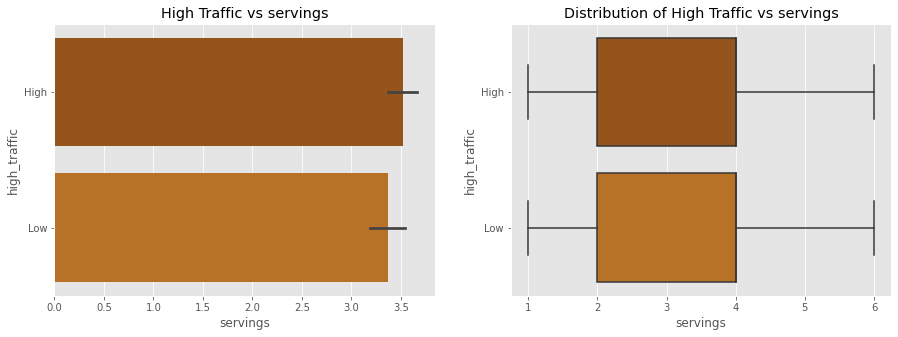

In [118]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=df, x='servings', y='high_traffic', ax=axes[0]).set(title='High Traffic vs servings')
sns.boxplot(data=df, x='servings', y='high_traffic', ax=axes[1]).set(title='Distribution of High Traffic vs servings')

### Categorical Variable - Category
#### Characteristics about Category
The category present shows a high percent of the recipe are under the category chicken with other category having approximately equal percentage.
#### Relationship between Category and High Traffic
This relationship shows that certain categories result in higher site traffic when considered overall compared to the correlation of other variables

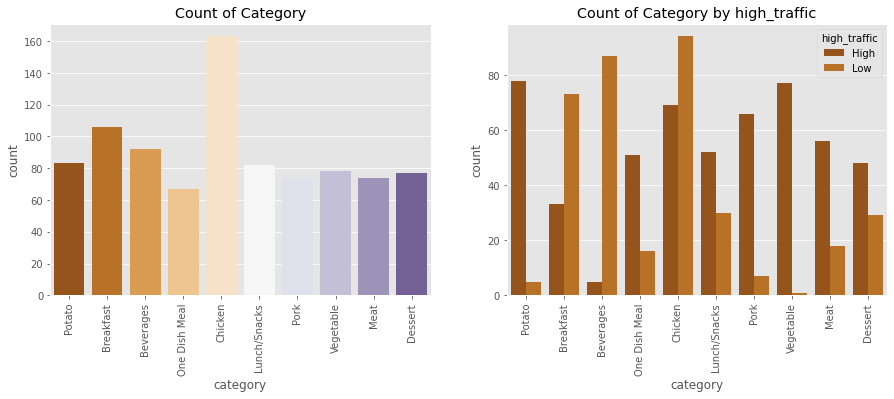

In [119]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='category', ax=axes[0]).set(title='Count of Category')
sns.countplot(data=df, x='category', hue='high_traffic', ax=axes[1]).set(title='Count of Category by high_traffic')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Potato'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Beverages'),
  Text(3, 0, 'One Dish Meal'),
  Text(4, 0, 'Chicken'),
  Text(5, 0, 'Lunch/Snacks'),
  Text(6, 0, 'Pork'),
  Text(7, 0, 'Vegetable'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Dessert')])

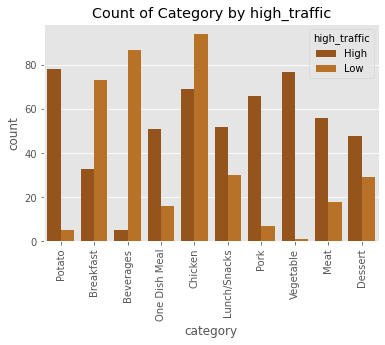

In [124]:
sns.countplot(data=df, x='category', hue='high_traffic').set(title='Count of Category by high_traffic')
plt.xticks(rotation=90)

[Text(0.5, 1.0, 'The Distribution of Feature Variable - Servings')]

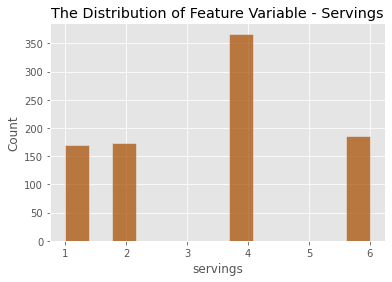

In [125]:
sns.histplot(data=df, x='servings').set(title='The Distribution of Feature Variable - Servings')

In [129]:
df.value_counts(['category', 'high_traffic'], sort=False)

category       high_traffic
Beverages      High             5
               Low             87
Breakfast      High            33
               Low             73
Chicken        High            69
               Low             94
Dessert        High            48
               Low             29
Lunch/Snacks   High            52
               Low             30
Meat           High            56
               Low             18
One Dish Meal  High            51
               Low             16
Pork           High            66
               Low              7
Potato         High            78
               Low              5
Vegetable      High            77
               Low              1
dtype: int64

In [128]:
df.value_counts('category', normalize=True)

category
Chicken          0.182123
Breakfast        0.118436
Beverages        0.102793
Potato           0.092737
Lunch/Snacks     0.091620
Vegetable        0.087151
Dessert          0.086034
Meat             0.082682
Pork             0.081564
One Dish Meal    0.074860
dtype: float64

In [130]:
df.value_counts('servings', normalize=True)

servings
4    0.410056
6    0.206704
2    0.194413
1    0.188827
dtype: float64

## Model Fitting & Evaluation
Predicting if the traffic is high based on the homepage recipe is a classification problem in machine learning. 

The Logistic Regression model was selected as a base model for a variety of reasons, the 2 main consideration are:
- There is little to no correlation between the feature variables .
- The target variable is binary classification

The comparison model selected is the Random Forest Classifier Model for the following reason:
- It is easy to interpret with independence from outliers.
- It uses a theoretical population to train each tree this helps avoid overfitting considering the extreme outliers

For the evaluation, I am choosing **Precision Score** and **F1 Score** to evaluate the model. Precision Score is used to measure how accurate the high traffic prediction of the model is. The confusion matrix measures the precision score, and the chances of type I and type II error.

### Prepare Data for Modelling

To enable modelling, we chose calories, sugar, protein, carbohydrate, category, servings as features variables with high_traffic as target variable. I also have made the following changes:
- Converted the categorical variables into numeric features
- Split the data into a training set and a test set
- Drop the missing data

In [28]:
df2 = df.copy()
le1 = LabelEncoder()
df2['category'] = le1.fit_transform(df2['category'])
df2.loc[(df2['high_traffic'] == 'High','high_traffic')] = int(1)
df2.loc[(df2['high_traffic'] == 'Low','high_traffic')] = int(0)
df2['high_traffic'] = df2['high_traffic'].astype('int')

In [29]:
feature_cols1 = list(set(df2.columns) - set(['recipe', 'high_traffic']))
X1 = df2[feature_cols1] # Features
y1 = df2['high_traffic'] # Target variable

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.332, random_state=42, stratify=y1)


### Logistic Regression

In [31]:
lr1 = LogisticRegression(random_state=42)

In [32]:
lr_grid1 = {'penalty': ['l1', 'l2'], 
           'C':[16, 15, 12, 7, 30], 
           'max_iter': [30, 40, 90, 100, 140], 
           'tol':[0.0001, 0.00008, 0.00005], 
           'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

In [33]:
lr_kf1 = StratifiedKFold(n_splits=10shuffle=True, random_state=42)

In [34]:
lr_cv1 = GridSearchCV(estimator=lr1, param_grid=lr_grid1, cv=lr_kf1, verbose=1)
lr_cv1.fit(X_train1, y_train1)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did n

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_s

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_s

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_s

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1125 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [16, 15, 12, 7, 30],
                         'max_iter': [30, 40, 90, 100, 140],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga'],
                         'tol': [0.0001, 8e-05, 5e-05]},
             verbose=1)

In [35]:
lrb1 = lr_cv1.best_estimator_
lrb1

LogisticRegression(C=15, random_state=42)

In [36]:
lr_cv1.best_score_

0.7538655462184873

In [37]:
lr_cv1.best_params_

{'C': 15, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [38]:
lrb1.score(X_test1, y_test1)

0.7516778523489933

In [39]:
y_pred1 = lrb1.predict(X_test1)
lrb1_ps = precision_score(y_test1, y_pred1)
lrb1_f1 = f1_score(y_test1, y_pred1)
print(f'Precision Score of Logistic Regression Model: {lrb1_ps}\nF1 Score of Logistic Regression Model: {lrb1_f1}')

Precision Score of Logistic Regression Model: 0.8466666666666667
F1 Score of Logistic Regression Model: 0.7743902439024392


[Text(0.5, 15.0, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression Model')]

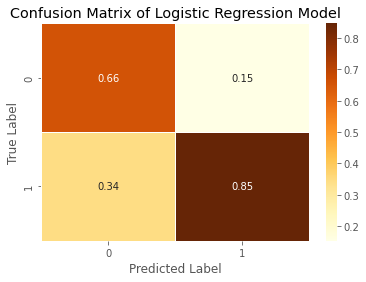

In [140]:
lrb1_cm = confusion_matrix(y_test1, y_pred1, normalize='pred')
sns.heatmap(lrb1_cm, annot=True, linewidth=1, cmap='YlOrBr').set(xlabel='Predicted Label', ylabel='True Label', title='Confusion Matrix of Logistic Regression Model')

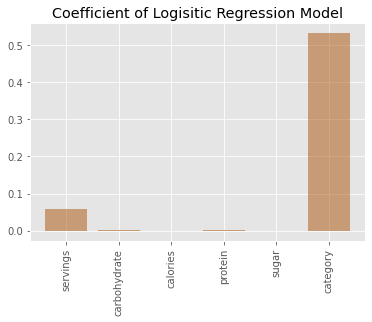

In [136]:
resultdict1 = {}
coef1 = lrb1.coef_[0]
for i in range(len(feature_cols1)):
    resultdict1[feature_cols1[i]] = coef1[i]

plt.bar(resultdict1.keys(),resultdict1.values(), alpha=0.5)#,color='gray')
plt.xticks(rotation='vertical')
plt.title('Coefficient of Logisitic Regression Model');

### Random Forest Classifier Model

In [42]:
rf1 = RandomForestClassifier(random_state=42)

In [43]:
rf_grid1 = {'n_estimators':[20, 30,40,10],
           'criterion':['gini', 'entropy'], 
           'max_depth':[23, 26, 29], 
           'bootstrap':[True, False], 
           'min_samples_split':[0.09,0.06,0.03],
           'oob_score': [True, False]}

In [44]:
rf_kf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
rf_cv1 = GridSearchCV(estimator=rf1, param_grid=rf_grid1, cv=rf_kf1, verbose=1, n_jobs=2)
rf_cv1.fit(X_train1, y_train1)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\envs\data_science_from_scratch\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only availa

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [23, 26, 29],
                         'min_samples_split': [0.09, 0.06, 0.03],
                         'n_estimators': [20, 30, 40, 10],
                         'oob_score': [True, False]},
             verbose=1)

In [46]:
rfb1 = rf_cv1.best_estimator_
rfb1

RandomForestClassifier(max_depth=23, min_samples_split=0.06, n_estimators=30,
                       oob_score=True, random_state=42)

In [47]:
rf_cv1.best_score_

0.7505462184873949

In [48]:
rf_cv1.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 23,
 'min_samples_split': 0.06,
 'n_estimators': 30,
 'oob_score': True}

In [49]:
rfb1.score(X_test1, y_test1)

0.7483221476510067

In [50]:
y_pred2 = rfb1.predict(X_test1)
rfb1_ps = precision_score(y_test1, y_pred2)
rfb1_f1 = f1_score(y_test1, y_pred2)
print(f'Precision Score of the Random Forest Classification Model: {rfb1_ps}\nF1 Score of Logistic Regression Model: {rfb1_f1}')

Precision Score of the Random Forest Classification Model: 0.7942857142857143
F1 Score of Logistic Regression Model: 0.7875354107648725


[Text(0.5, 15.0, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier Model')]

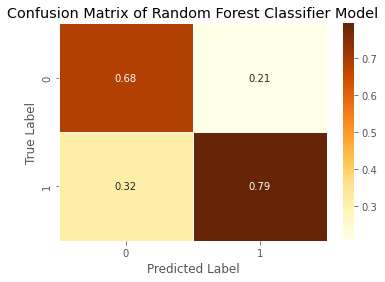

In [139]:
rfb1_cm = confusion_matrix(y_test1, y_pred2, normalize='pred')
sns.heatmap(rfb1_cm, annot=True, linewidth=1, cmap='YlOrBr').set(xlabel='Predicted Label', ylabel='True Label', title='Confusion Matrix of Random Forest Classifier Model')

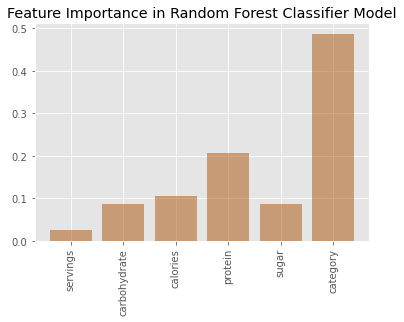

In [135]:
importance1 = rfb1.feature_importances_
#new_column_names=['Year','Transmission', 'Fuel Type','Engine Size','Tax','Model','Mileage']
f_importance1 = {}
for i in range(len(feature_cols1)):
     f_importance1[feature_cols1[i]] = importance1[i]
        
plt.bar(f_importance1.keys(),f_importance1.values(),alpha=0.5)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random Forest Classifier Model');

## Results
The Precision Score of the Logistic Regression and the Random Forest Model is 0.85 and 0.79 respectively, meaning the **Logistic Regression Model is better able to make correct prediction of high traffic recipes.**  The F1 Score of the Logistic Regression Model and the Random Forest Model is ** and ** respectively, meaning the **Logistic Regression Model has a lower chance of false positive and false negative.**

### Evaluate by Business Criteria
The company wants to avoid predictions of high traffic recipes that are false. Therefore, the accuracy of the positive prediction is used as a kPI to compare the two models again. The higher the precision score the better the accuracy of the better the model performs.
The company requires a precision score of at least 80%

The company wants to avoid prediction out of a range - within 10% of the actual price. Therefore, we would consider using
percentage of predictions within 10% of the actual price as a KPI to compare the two models again. The higher the 
percentage, the better the model performs. 69.4% of the decision tree regressor prediction is within 10% of the actual 
price, while the linear regression model only have 61.8%.

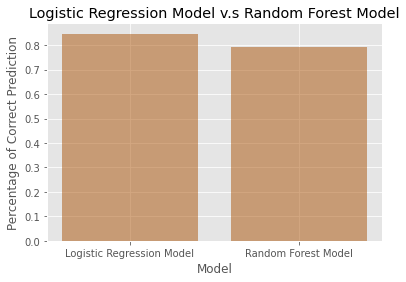

In [132]:
ps_list = [lrb1_ps,rfb1_ps]
labels =['Logistic Regression Model','Random Forest Model']
plt.bar(labels, ps_list, alpha=0.5)


# Add labels to the chart
plt.title('Logistic Regression Model v.s Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Percentage of Correct Prediction')

# Show the chart
plt.show()

## Recommendation 
In order to increase the traffic on the site, we can deploy this **Logistic Regression Model** into production. By implementing this model, about 85% of the high traffic recipe prediction will result in an increase in traffic to the rest of the site. I will reccomend the following to ensure can be deployed and be retrained to accommodate for increase in data variation.

1. Test the model in the recent month using an A/B Test to compare the site traffic generated by the predicted recipe to those generated by the selection of the product manager.

2. Identify and fix errors to improve accuracy after testing.

3. Fully deploy the model using efficient deployment strategy, such as a plugin API for the website.

4. The model can be continuously improved by collecting more data, feature engineer and fine tuning parameter. This is important due to the limited number of categories in the category variable and the limited serving distribution.